<a href="https://colab.research.google.com/github/VanessaPaola23/PythonScripts/blob/main/Describing_histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reto 3: Describiendo histogramas

### 1. Objetivos:
    - Generar histogramas y caracterizarlos utilizando las herramientas que hemos aprendido hasta el momento

---
    
### 2. Desarrollo:

#### a) Pima Indians Diabetes Database

Vamos a analizar un conjunto de datos que contiene datos acerca del estado de salud de mujeres menores de 21 años de ascendencia [pima](https://es.wikipedia.org/wiki/Pueblo_pima). El conjunto también tiene una columna 'outcome' que indica si las pacientes fueron diagnosticadas con diabetes o no. Puedes ver la descripción completa [aquí](https://www.kaggle.com/uciml/pima-indians-diabetes-database).  El dataset está guardado con el nombre de `diabetes-clean.csv`.

- Todas las variables independientes en este dataset son numéricas. Genera histogramas de todas las variables independientes para observar la distribución de estas variables. Un valor aceptable para el número de `bins` es `50`. Después de generar el histograma, caracterízalo con una descripción utilizando los términos que has aprendido en esta sesión.

- Intenta también discernir a simple vista la asimetría y curtosis de tus histogramas, y después confirma tus hipótesis utilizando las funciones `kurtosis` y `skew` del módulo `scipy.stats`.

- Ve si te es posible identificar la cantidad y magnitud de los valores atípicos usando histogramas. ¿Cuál ha sido la técnica que te ha facilitado más la identificación de valores atípicos? ¿Boxplots, tablas de frecuencias o histogramas?

Comenta con la experta y con tus compañeros por qué crees que esas variables tengan la distribución que tienen.

In [ ]:
# 1. Importar el módulo 'os' para interactuar con el sistema operativo y realizar operaciones como cambiar el directorio de trabajo.
import os

# 2. Importar la función 'drive' de la biblioteca 'google.colab' para montar Google Drive en el entorno Colab.
from google.colab import drive

# 3. Montar Google Drive para acceder a los archivos almacenados en él.
#    - '/content/drive': Es el punto de montaje en el sistema de archivos de Colab.
#    - Al montar Google Drive, se creará una carpeta 'drive' en el directorio '/content',
#      que representa el almacenamiento de Google Drive en el entorno de Colab.
drive.mount('/content/drive')

# 4. Establecer el directorio de trabajo en el entorno de Colab.
#    - 'path': Variable que almacena la ruta del directorio de trabajo deseado en Google Drive.
#    - Utilizamos la función 'os.chdir()' para cambiar el directorio de trabajo actual del entorno de Colab a la ruta especificada.
#    - Esto es útil para acceder a archivos en un directorio específico sin necesidad de especificar rutas absolutas cada vez.
path = '/content/drive/MyDrive/Colab Notebooks/notebooks/Sesión 02'
os.chdir(path)

#

# 5. Imprimir el directorio de trabajo actual para confirmar que el cambio ha sido exitoso.
#    - 'os.getcwd()' devuelve el directorio de trabajo actual. Es útil para verificar si el cambio de directorio se realizó correctamente.
print("Directorio actual:", os.getcwd())

# 6. Listar los archivos en el directorio actual.
#    - 'os.listdir()': Función que devuelve una lista de los nombres de los archivos y directorios en el directorio actual.
#    - Se utiliza para verificar los archivos disponibles en el directorio de trabajo establecido.
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directorio actual: /content/drive/MyDrive/Colab Notebooks/notebooks/Sesión 02


['describiendo_histogramas.ipynb']

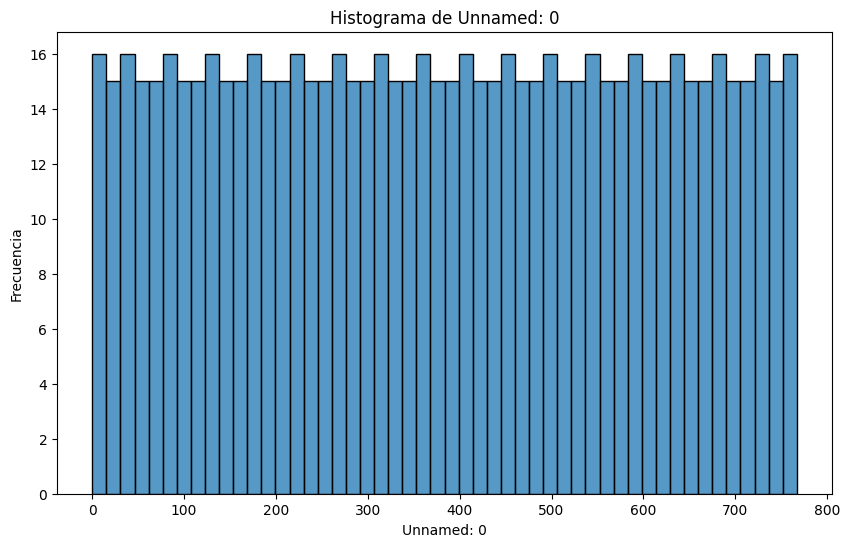


Caracterización de Unnamed: 0:
Asimetría: 0.0
Curtosis: -1.200004069017315
La distribución es simétrica.
La distribución es platicúrtica (colas ligeras).


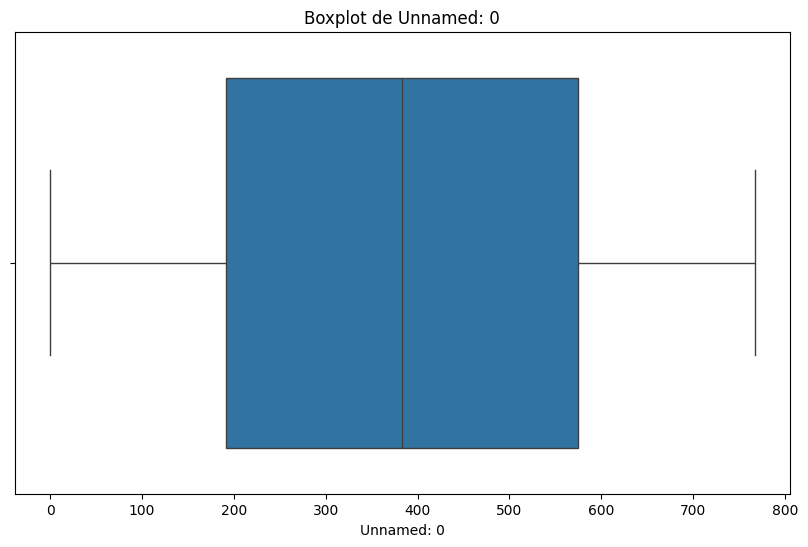

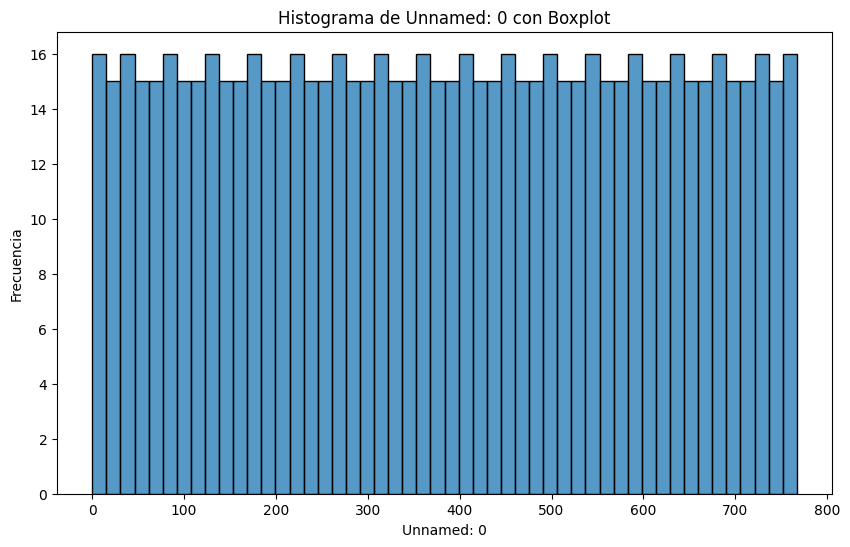

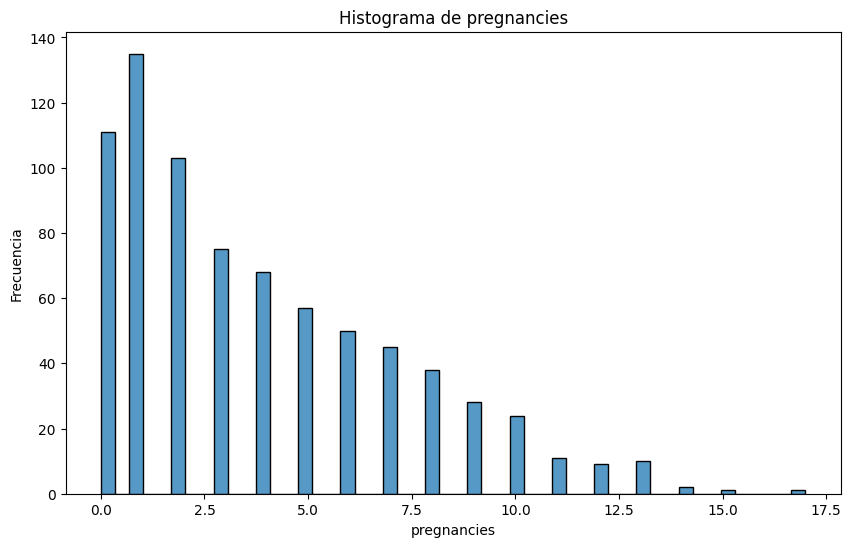


Caracterización de pregnancies:
Asimetría: 0.8999119408414357
Curtosis: 0.15038273760948462
La distribución es sesgada a la derecha.
La distribución es leptocúrtica (colas pesadas).


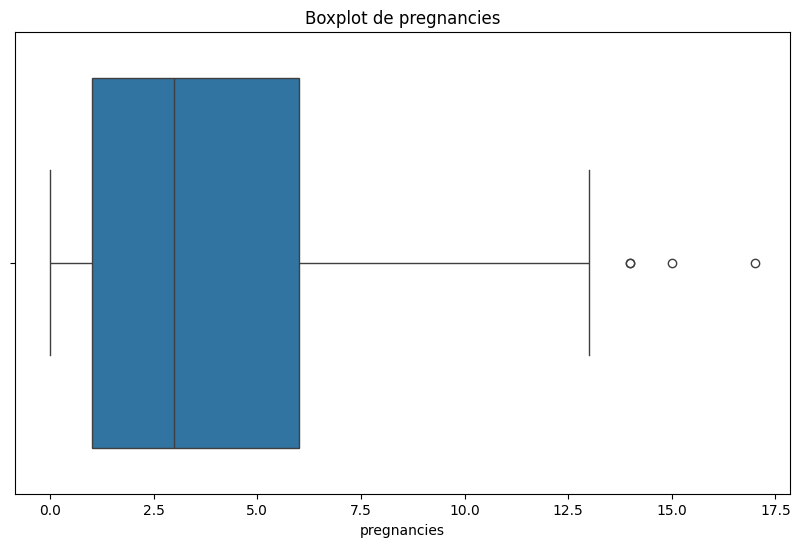

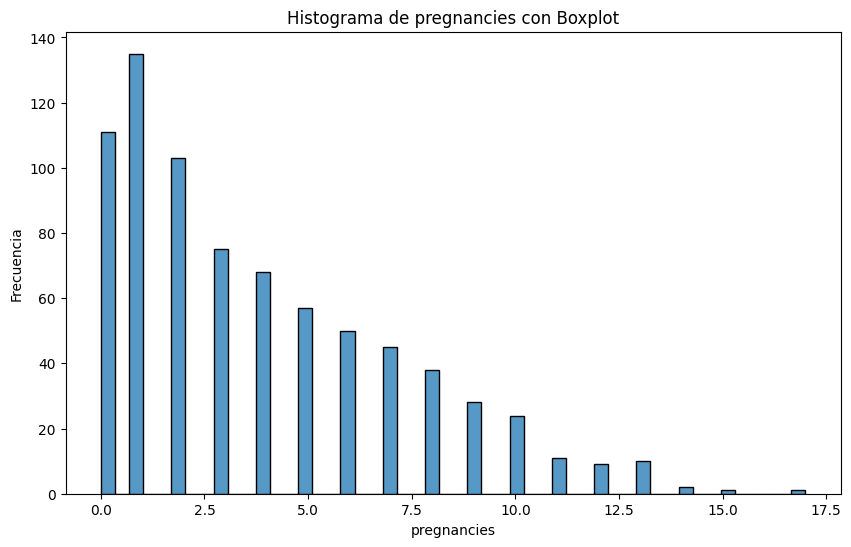

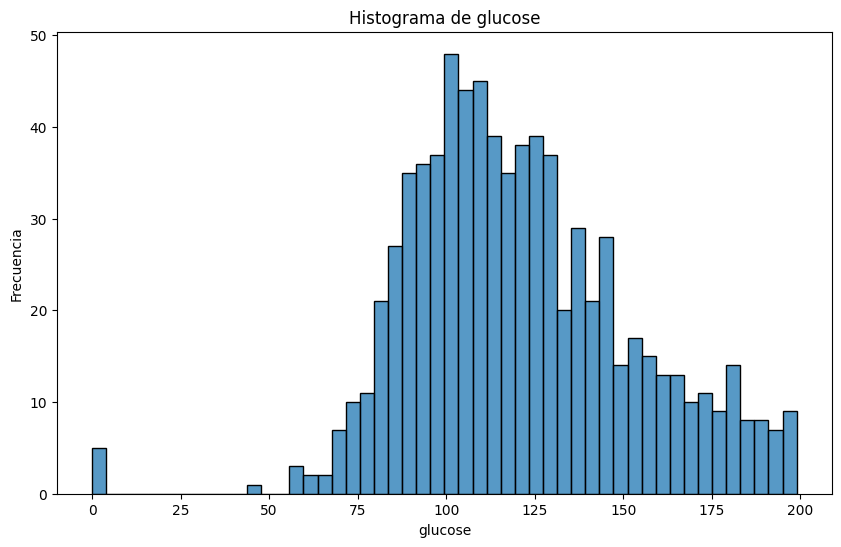


Caracterización de glucose:
Asimetría: 0.17341395519987735
Curtosis: 0.6288133337300685
La distribución es sesgada a la derecha.
La distribución es leptocúrtica (colas pesadas).


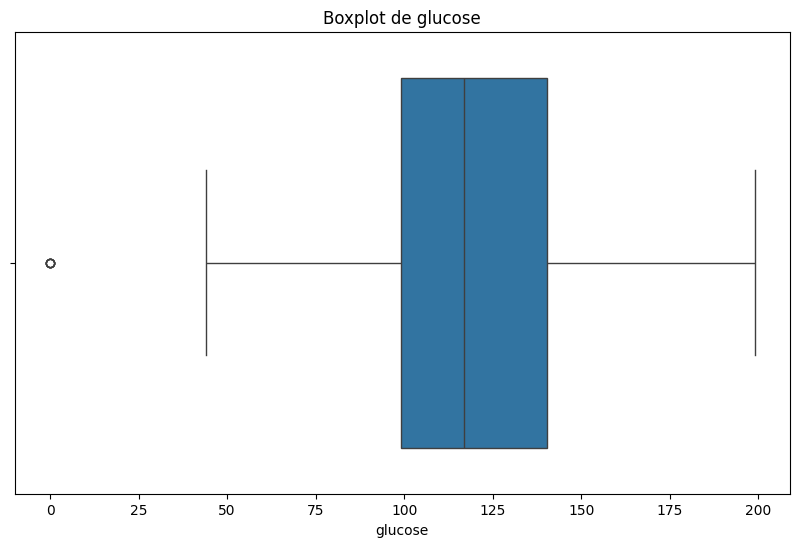

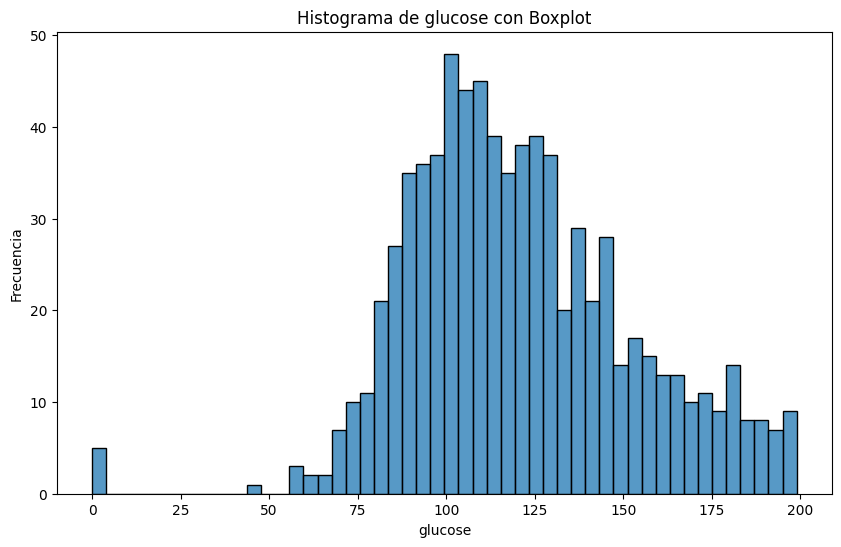

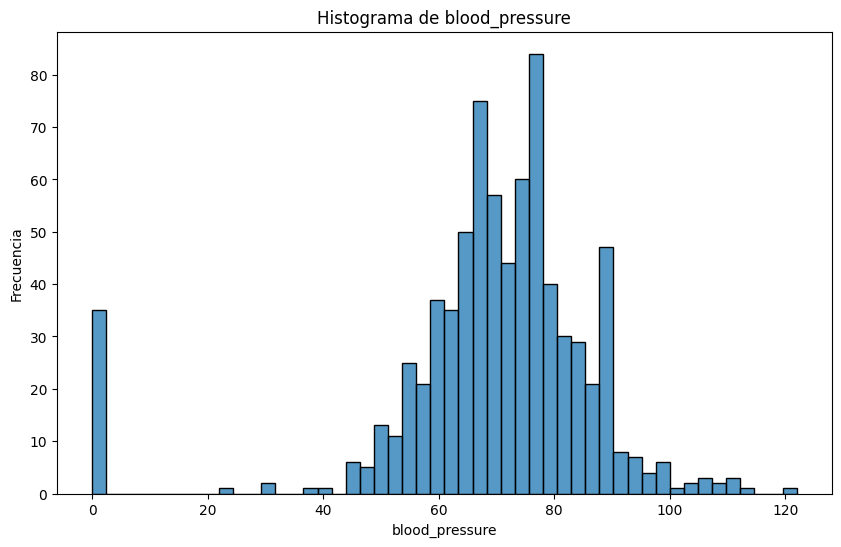


Caracterización de blood_pressure:
Asimetría: -1.8400052311728738
Curtosis: 5.138690662525438
La distribución es sesgada a la izquierda.
La distribución es leptocúrtica (colas pesadas).


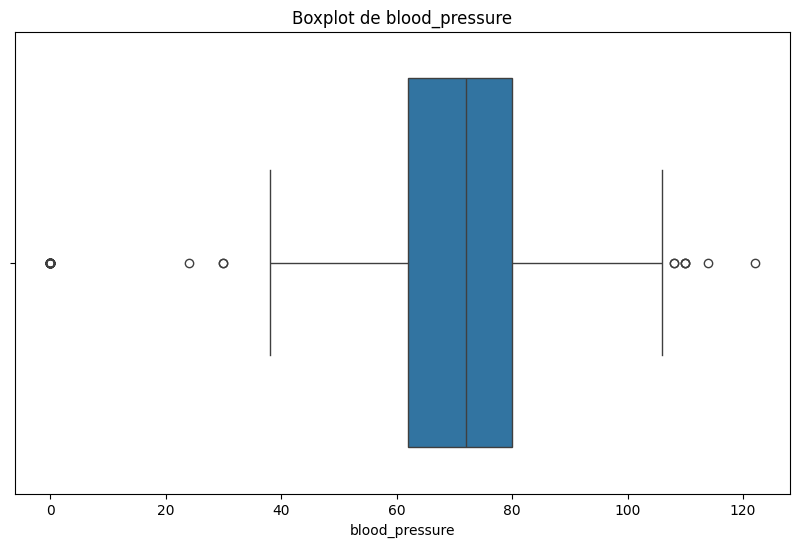

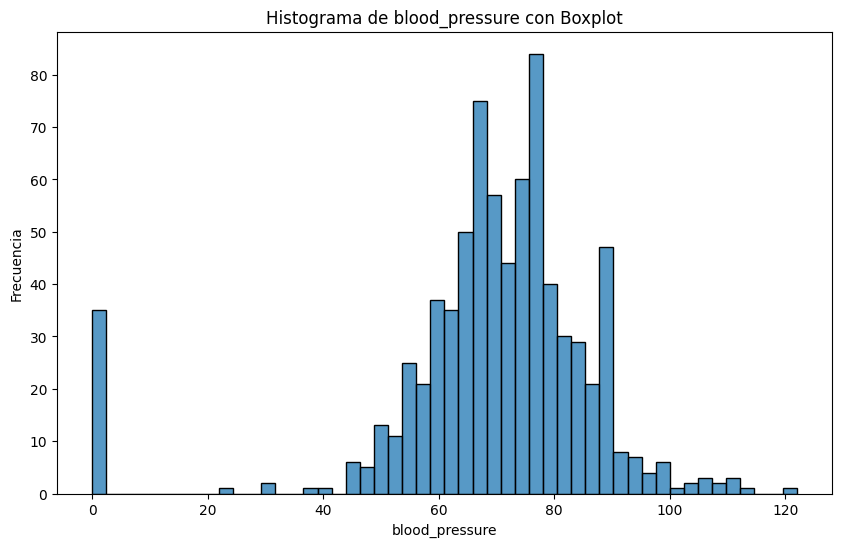

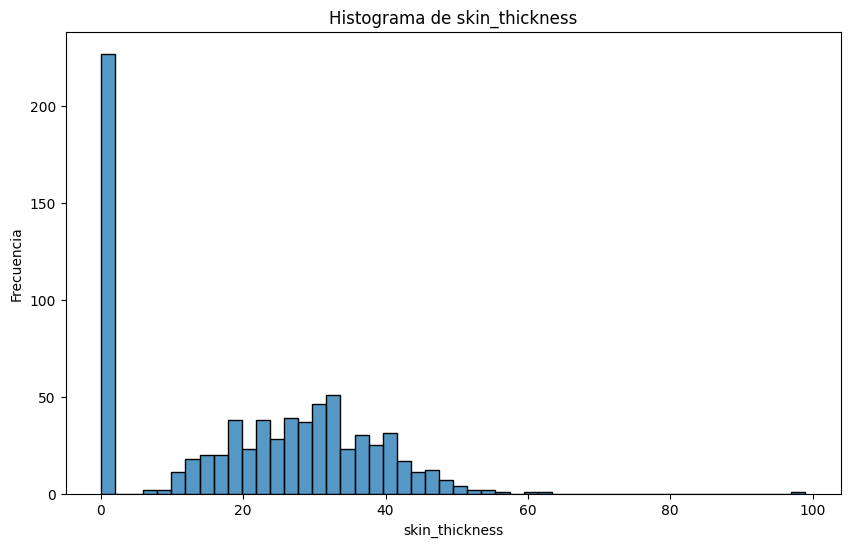


Caracterización de skin_thickness:
Asimetría: 0.109158762323673
Curtosis: -0.5244944887652805
La distribución es sesgada a la derecha.
La distribución es platicúrtica (colas ligeras).


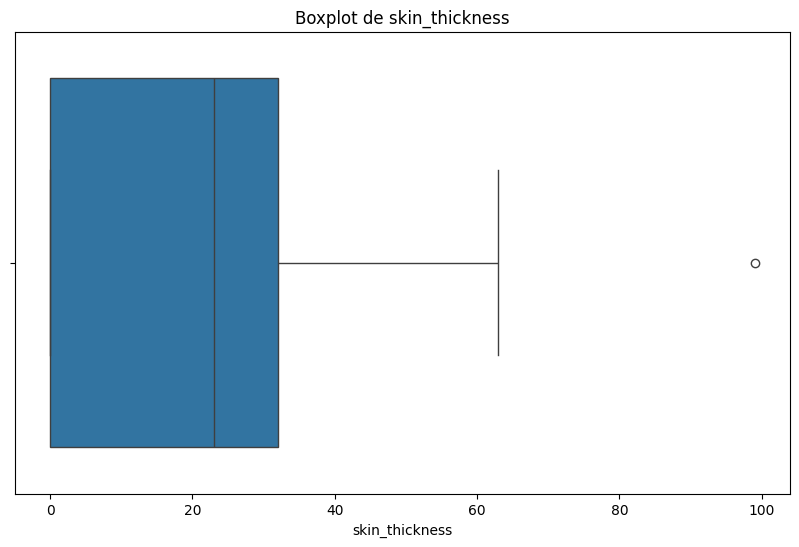

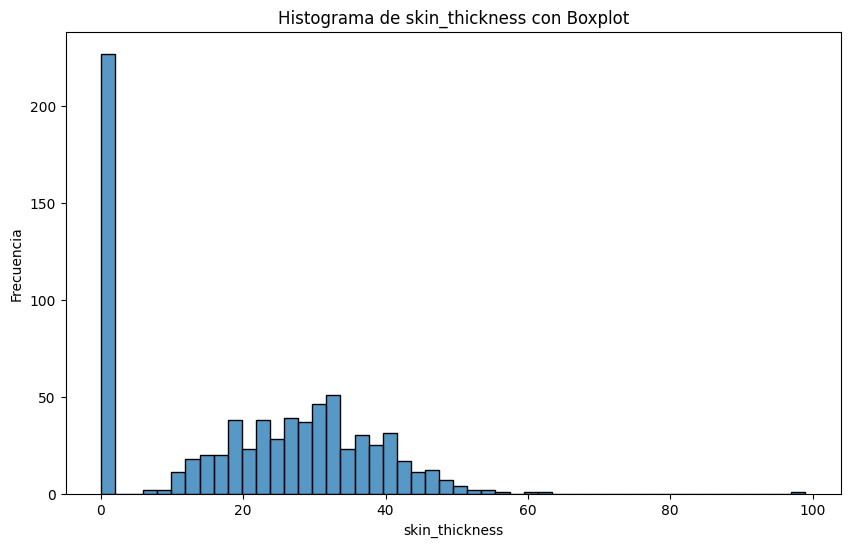

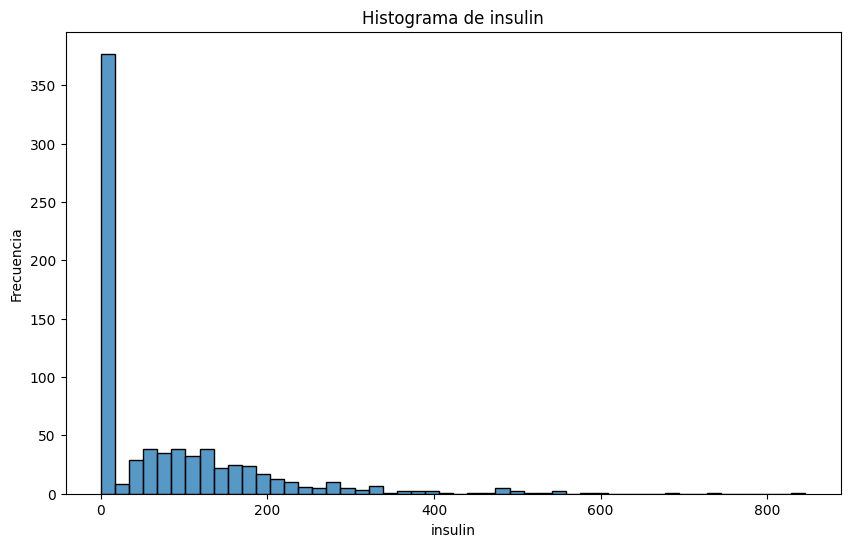


Caracterización de insulin:
Asimetría: 2.2678104585131753
Curtosis: 7.159574916971424
La distribución es sesgada a la derecha.
La distribución es leptocúrtica (colas pesadas).


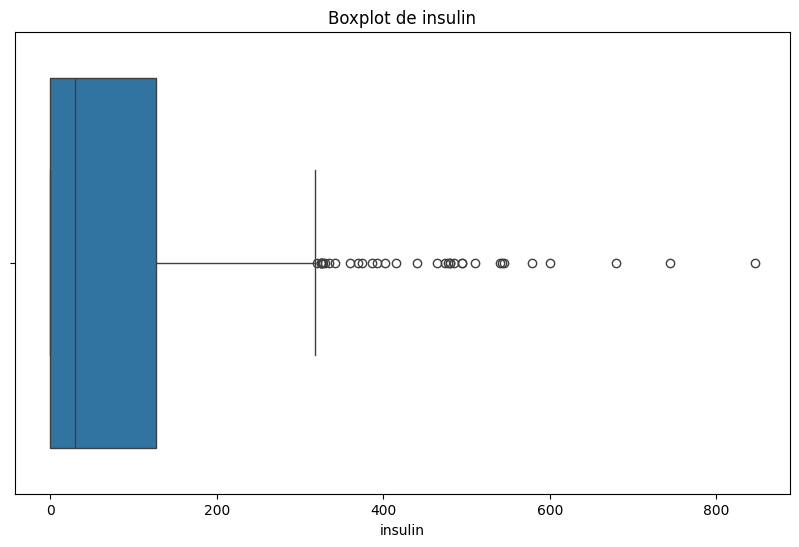

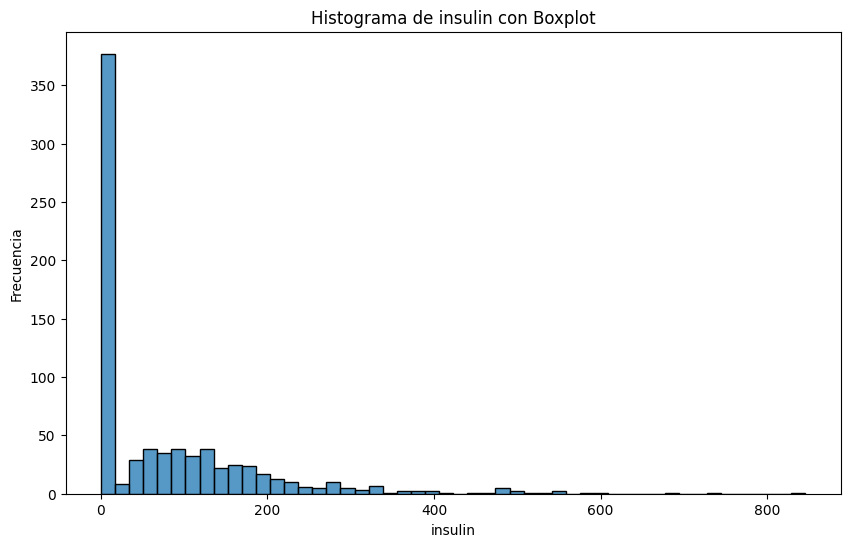

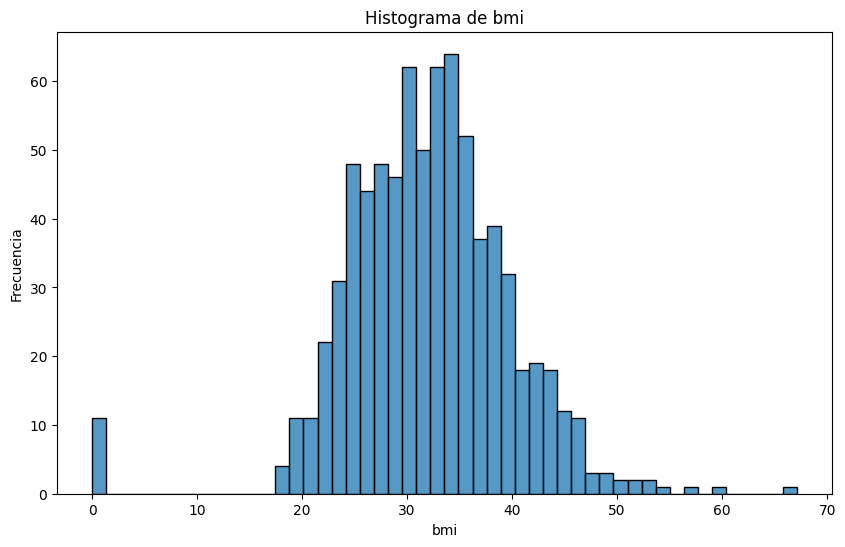


Caracterización de bmi:
Asimetría: -0.42814327880861786
Curtosis: 3.2612574203612645
La distribución es sesgada a la izquierda.
La distribución es leptocúrtica (colas pesadas).


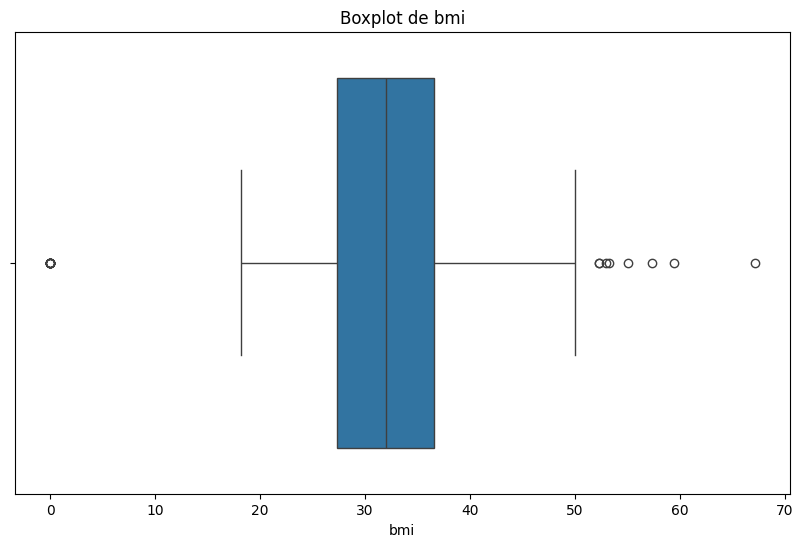

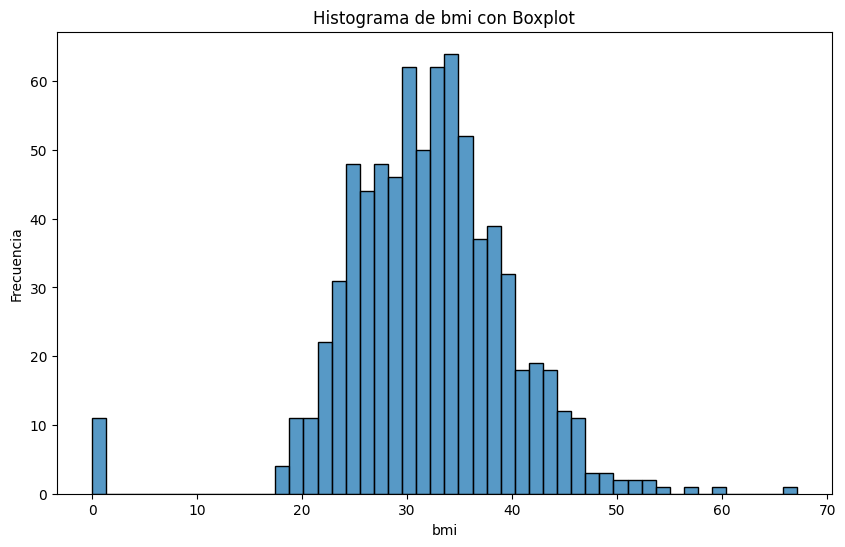

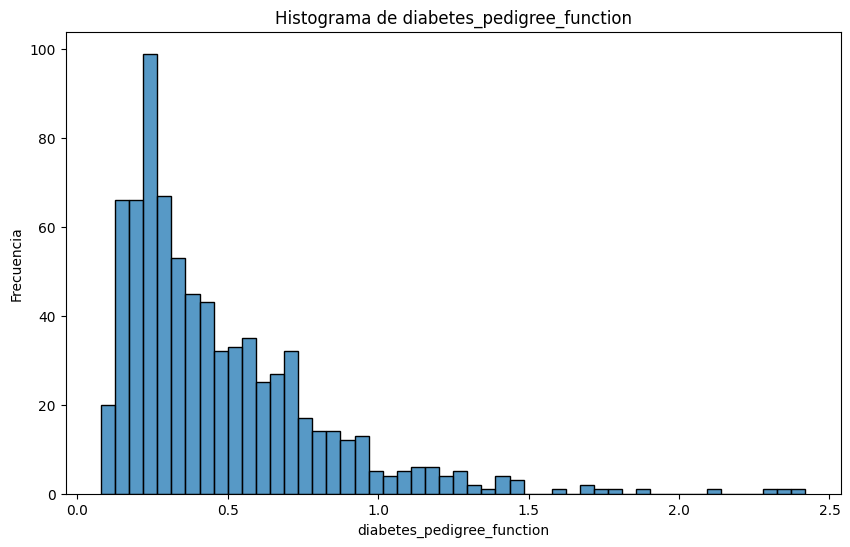


Caracterización de diabetes_pedigree_function:
Asimetría: 1.9161592037386292
Curtosis: 5.550792047551205
La distribución es sesgada a la derecha.
La distribución es leptocúrtica (colas pesadas).


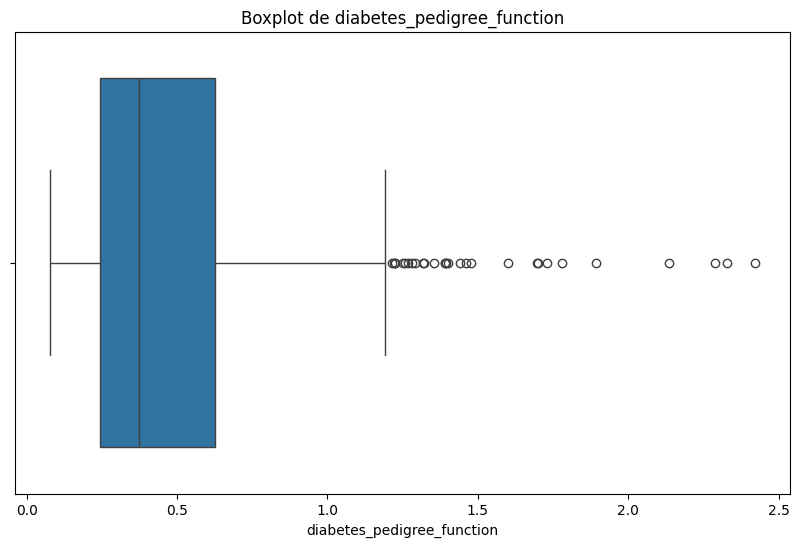

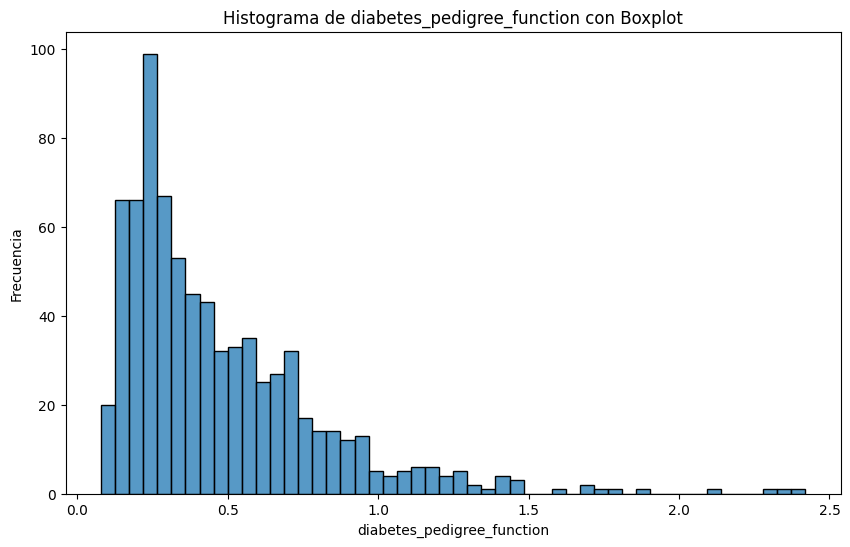

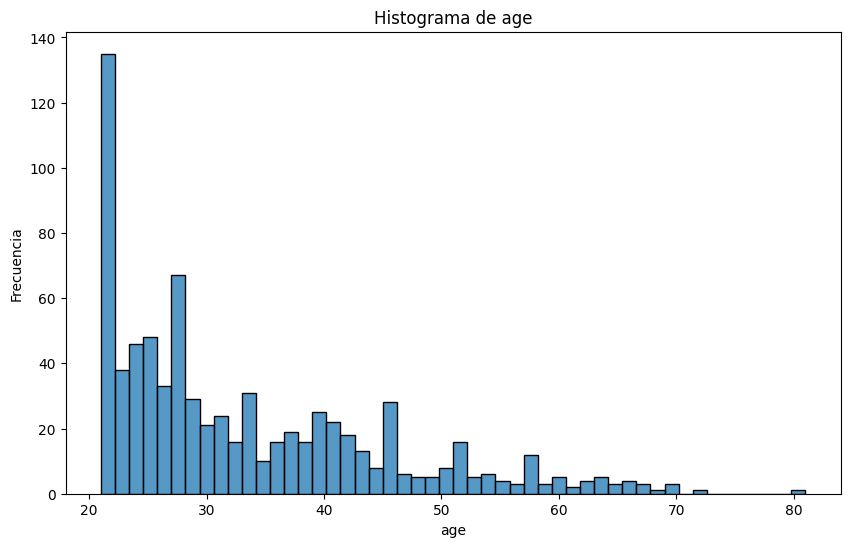


Caracterización de age:
Asimetría: 1.127389259531697
Curtosis: 0.6311769413798585
La distribución es sesgada a la derecha.
La distribución es leptocúrtica (colas pesadas).


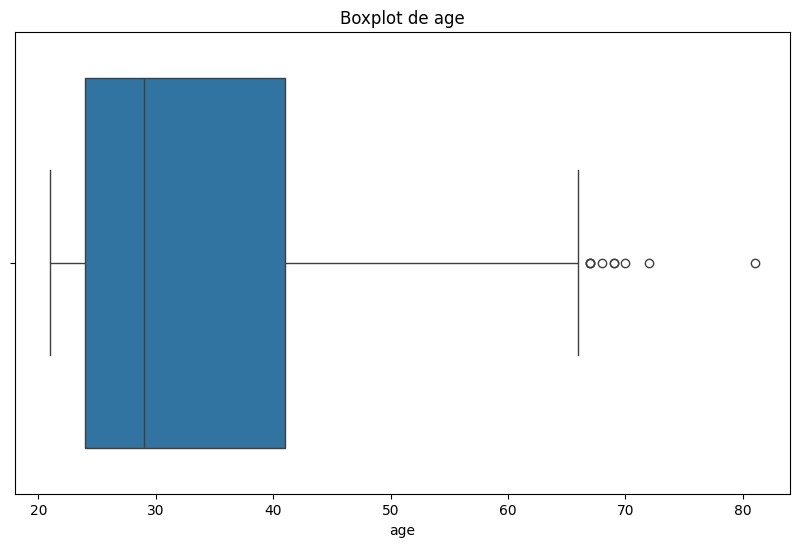

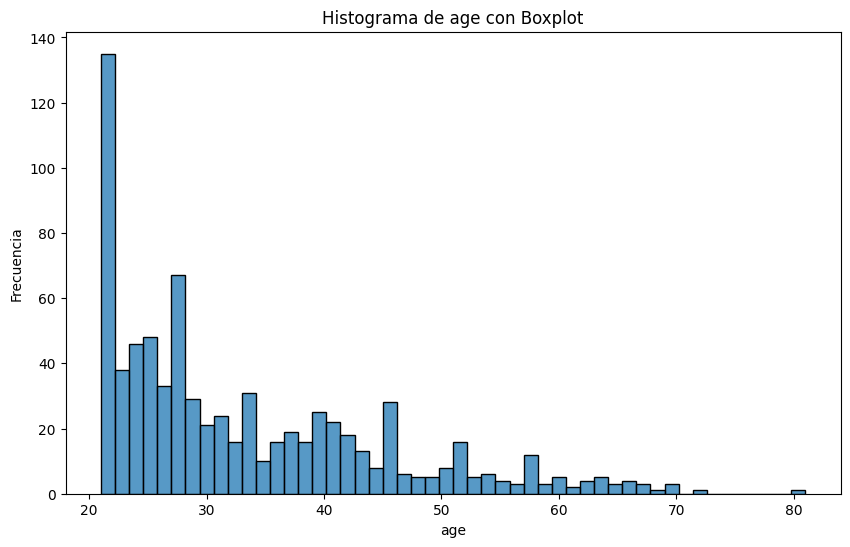

In [ ]:
# 0. Importar las bibliotecas necesarias.
#    - 'numpy' es una biblioteca de Python utilizada para operaciones matemáticas y manejo de arrays.
#    - 'pandas' es una biblioteca de Python utilizada para el análisis y manipulación de datos.
#    - 'seaborn' es una biblioteca para la visualización de datos basada en Matplotlib.
#    - 'matplotlib.pyplot' es una biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python.
from scipy.stats import skew, kurtosis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el dataset de Pima Indians Diabetes utilizando pandas.
#    - 'pd.read_csv()' se usa para leer el archivo CSV y cargarlo en un DataFrame.
#    - Se utiliza la URL proporcionada como argumento para acceder directamente al archivo en línea.
url = 'https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020/master/Datasets/diabetes-clean.csv'
df_diabetes = pd.read_csv(url)

# 2. Generar histogramas de todas las variables independientes.
#    - Se utiliza un loop para iterar sobre las columnas del DataFrame y generar un histograma para cada variable.
#    - Se utiliza 'plt.figure(figsize=(10, 6))' para ajustar el tamaño de las gráficas.
for column in df_diabetes.columns[:-1]:  # Excluir la columna 'outcome'
    plt.figure(figsize=(10, 6))
    sns.histplot(df_diabetes[column], bins=50, kde=False)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

    # 3. Caracterizar el histograma utilizando términos aprendidos anteriormente.
    #    - Se utiliza 'skew' y 'kurtosis' para calcular la asimetría y la curtosis, respectivamente.
    skewness = skew(df_diabetes[column])
    kurt = kurtosis(df_diabetes[column])

    #    - Se imprime la descripción de la distribución utilizando los valores calculados.
    print(f"\nCaracterización de {column}:")
    print(f"Asimetría: {skewness}")
    print(f"Curtosis: {kurt}")

    #    - Se utiliza una lógica simple para dar una descripción general basada en los valores de asimetría y curtosis.
    if skewness > 0:
        print("La distribución es sesgada a la derecha.")
    elif skewness < 0:
        print("La distribución es sesgada a la izquierda.")
    else:
        print("La distribución es simétrica.")

    if kurt > 0:
        print("La distribución es leptocúrtica (colas pesadas).")
    elif kurt < 0:
        print("La distribución es platicúrtica (colas ligeras).")
    else:
        print("La distribución es mesocúrtica (normal).")

    # 4. Identificar valores atípicos utilizando histogramas.
    #    - Se utiliza 'sns.boxplot' para visualizar boxplots y 'sns.histplot' con 'bins=50' para identificar valores atípicos.
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_diabetes[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(df_diabetes[column], bins=50, kde=False)
    plt.title(f'Histograma de {column} con Boxplot')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# 5. Identificar valores atípicos utilizando otras técnicas (Boxplots y tablas de frecuencias).
#    - Se pueden utilizar otras técnicas como boxplots y tablas de frecuencias para identificar valores atípicos.
#    - Dependiendo de la distribución de los datos, una técnica puede ser más útil que otra.
#    - Comentar sobre la técnica que consideres más efectiva y por qué.
